In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Biar plot lebih rapih
plt.rcParams["figure.figsize"] = (6, 6)

# GANTI path ini dengan file trial yang mau kamu cek
TRIAL_PATH = r"E:\0.TA_Teguh\dataset2\hasil_clustering\Afi\clustering_Jalan3.csv"

df_trial = pd.read_csv(TRIAL_PATH)

print(df_trial.head())
print("\nJumlah frame unik:", df_trial["frame"].nunique())
print("Range frame:", df_trial["frame"].min(), "sampai", df_trial["frame"].max())


         timestamp  frame         x         y         z  doppler    SNR  \
0  17:41:42.446237      1 -0.008175  0.235885  2.091106  2.57460   3.88   
1  17:41:42.446237      1  0.303421  0.164108  0.783462 -0.27832   4.64   
2  17:41:42.446237      1  0.301604  0.147353  0.846603 -0.27832   4.52   
3  17:41:42.446237      1  0.310855  0.367793  1.413656  2.22656  10.64   
4  17:41:42.446237      1  0.315910  0.364766  1.414467  2.22656  13.52   

   cluster_id  
0          -1  
1          -1  
2          -1  
3           0  
4           0  

Jumlah frame unik: 86
Range frame: 1 sampai 86


In [15]:
def plot_clusters_for_frame_df(df, frame_id, projection="xy"):
    """
    df        : DataFrame satu trial (sudah dibaca dari CSV)
    frame_id  : nomor frame yang ingin ditampilkan
    projection: "xy" atau "xz" (kalau mau lihat tinggi)
    """
    df_f = df[df["frame"] == frame_id]
    if df_f.empty:
        print(f"Tidak ada data untuk frame {frame_id}")
        return
    
    # Pilih sumbu
    if projection == "xy":
        x_col, y_col = "x", "y"
        xlabel, ylabel = "x (m)", "y (m)"
    elif projection == "xz":
        x_col, y_col = "x", "z"
        xlabel, ylabel = "x (m)", "z (m)"
    else:
        raise ValueError("projection harus 'xy' atau 'xz'")
    
    plt.figure()
    
    # Plot berdasarkan cluster_id
    cluster_ids = sorted(df_f["cluster_id"].unique())
    for cid in cluster_ids:
        sub = df_f[df_f["cluster_id"] == cid]
        if cid == -1:
            label = "noise (-1)"
            alpha = 0.3
        else:
            label = f"cluster {cid}"
            alpha = 0.8
        plt.scatter(sub[x_col], sub[y_col], label=label, alpha=alpha)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Frame {frame_id} – projection {projection}")
    plt.legend()
    plt.axis("equal")
    plt.grid(True)
    plt.show()


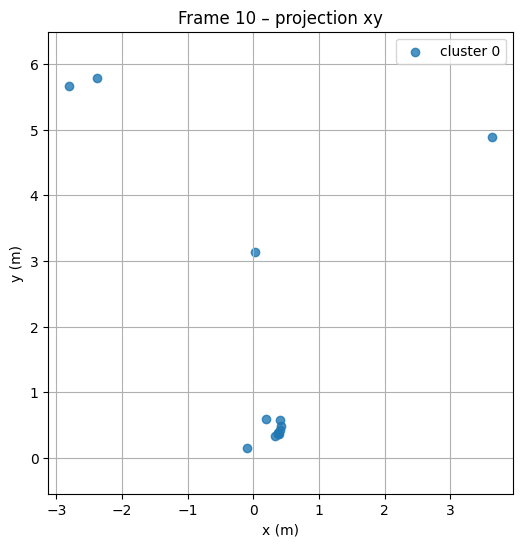

In [16]:
plot_clusters_for_frame_df(df_trial, frame_id=10, projection="xy")


In [18]:
import ipywidgets as widgets
from IPython.display import display

frames_sorted = sorted(df_trial["frame"].unique())

def interactive_plot(frame_id, projection):
    plot_clusters_for_frame_df(df_trial, frame_id=frame_id, projection=projection)

frame_slider = widgets.IntSlider(
    value=frames_sorted[0],
    min=frames_sorted[0],
    max=frames_sorted[-1],
    step=1,
    description='Frame:',
    continuous_update=False
)

projection_dropdown = widgets.Dropdown(
    options=[('x-y', 'xy'), ('x-z', 'xz')],
    value='xy',
    description='View:'
)

ui = widgets.HBox([frame_slider, projection_dropdown])
out = widgets.interactive_output(interactive_plot, {'frame_id': frame_slider, 'projection': projection_dropdown})

display(ui, out)


Output()

In [19]:
from mpl_toolkits.mplot3d import Axes3D  # diperlukan untuk 3D plot

def plot_clusters_for_frame_3d(df, frame_id):
    """
    Plot 3D (x, y, z) titik untuk satu frame tertentu, diwarnai berdasarkan cluster_id.
    Noise (-1) dibuat lebih transparan.
    """
    df_f = df[df["frame"] == frame_id]
    if df_f.empty:
        print(f"Tidak ada data untuk frame {frame_id}")
        return
    
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    cluster_ids = sorted(df_f["cluster_id"].unique())
    for cid in cluster_ids:
        sub = df_f[df_f["cluster_id"] == cid]
        if cid == -1:
            label = "noise (-1)"
            alpha = 0.2
        else:
            label = f"cluster {cid}"
            alpha = 0.8
        ax.scatter(sub["x"], sub["y"], sub["z"], label=label, alpha=alpha)
    
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_zlabel("z (m)")
    ax.set_title(f"Frame {frame_id} – 3D view")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

frames_sorted = sorted(df_trial["frame"].unique())

def interactive_plot_3d(frame_id):
    plot_clusters_for_frame_3d(df_trial, frame_id=frame_id)

frame_slider = widgets.IntSlider(
    value=frames_sorted[0],
    min=frames_sorted[0],
    max=frames_sorted[-1],
    step=1,
    description='Frame:',
    continuous_update=False
)

ui = widgets.HBox([frame_slider])
out = widgets.interactive_output(interactive_plot_3d, {'frame_id': frame_slider})

display(ui, out)


Output()

In [ ]:
frames_sorted = sorted(df_trial["frame"].unique())

for f in frames_sorted[:50]:  # batasi 50 frame pertama dulu biar nggak kebanyakan
    print(f"=== Frame {f} ===")
    plot_clusters_for_frame_df(df_trial, frame_id=f, projection="xy")


In [21]:
def list_full_noise_frames(df):
    full_noise_frames = []
    for frame_id, group in df.groupby("frame"):
        if (group["cluster_id"] != -1).sum() == 0:
            full_noise_frames.append(frame_id)
    return full_noise_frames

full_noise = list_full_noise_frames(df_trial)
print("Frame yang full noise:", full_noise)
print("Jumlah frame full noise:", len(full_noise), "dari total", df_trial["frame"].nunique(), "frame")


Frame yang full noise: [22, 24, 25, 28, 30, 34, 35, 36, 49, 52, 53, 60, 63]
Jumlah frame full noise: 13 dari total 86 frame


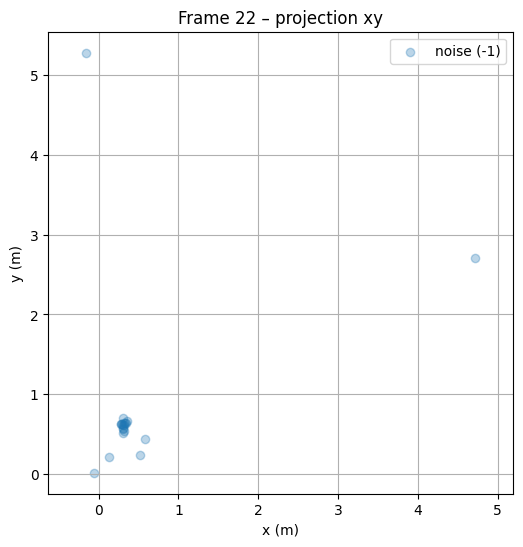

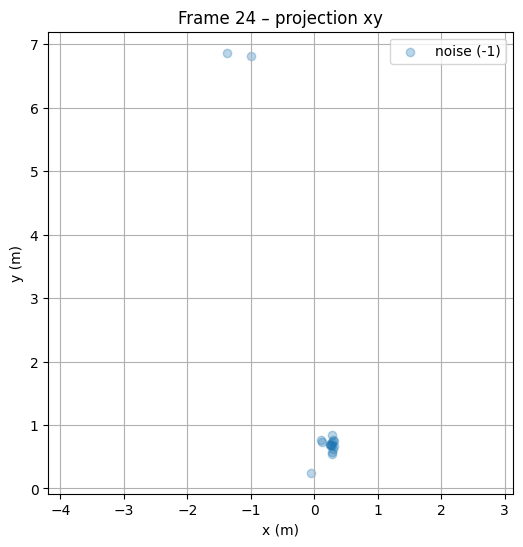

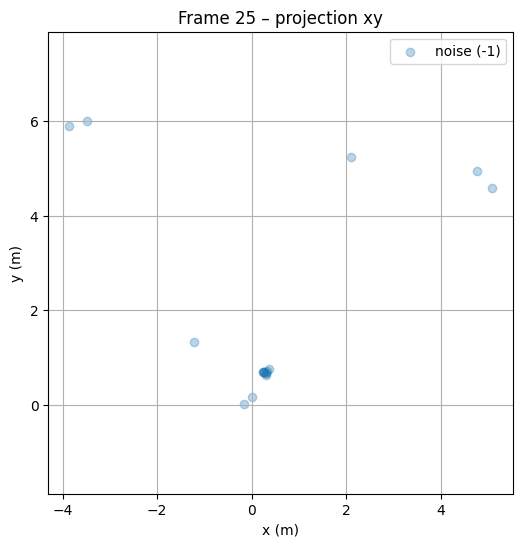

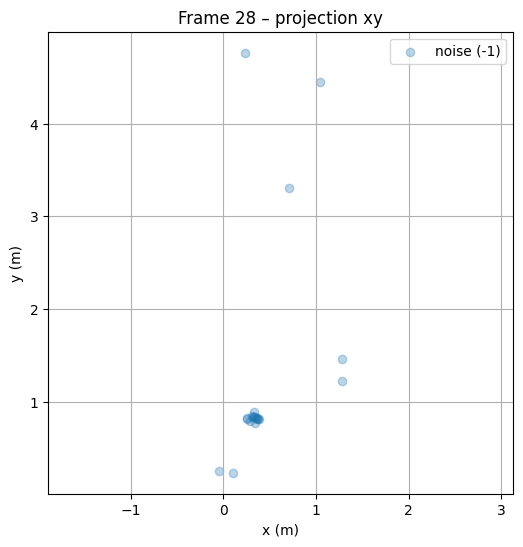

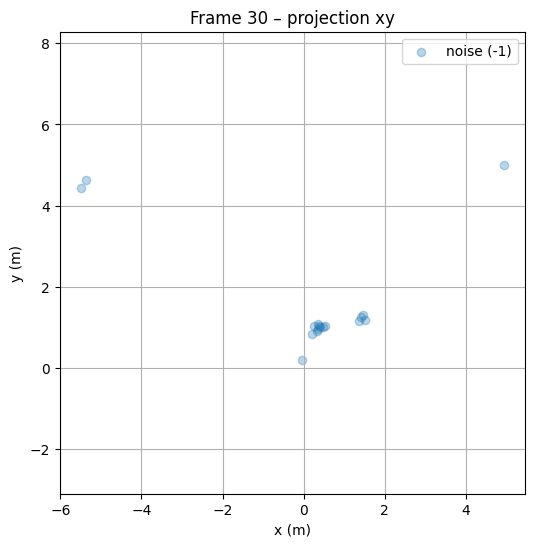

In [ ]:
for f in full_noise[:5]:
    plot_clusters_for_frame_df(df_trial, frame_id=f, projection="xy")
